# Patterns and Implications of Missing Immigrants Data

In [124]:
import pandas as pd
file_path = r"C:\Users\adity\Downloads\Missing_Migrants_Global_Figures_allData_3.csv"

In [125]:
df = pd.read_csv(file_path)

In [126]:
df.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,...,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,...,Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,...,Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,...,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,...,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR


In [127]:
df.shape

(13332, 25)

In [128]:
# Specify the columns you want to print
columns_to_print = ['Incident year', 'Number of Females', 'Number of Males']

# Print the selected columns
print(df[columns_to_print])


       Incident year  Number of Females  Number of Males
0               2014                NaN              1.0
1               2014                NaN              NaN
2               2014                NaN              NaN
3               2014                NaN              1.0
4               2014                NaN              1.0
...              ...                ...              ...
13327           2023                NaN              1.0
13328           2023                NaN              NaN
13329           2023                1.0              NaN
13330           2023                NaN              1.0
13331           2023                4.0              NaN

[13332 rows x 3 columns]


In [129]:
column_types = df.dtypes

In [130]:
column_types

Main ID                                 object
Incident ID                             object
Incident Type                           object
Region of Incident                      object
Website Date                            object
Incident year                            int64
Reported Month                          object
Number of Dead                         float64
Minimum Estimated Number of Missing    float64
Total Number of Dead and Missing         int64
Number of Survivors                    float64
Number of Females                      float64
Number of Males                        float64
Number of Children                     float64
Region of Origin                        object
Cause of Death                          object
Country of Origin                       object
Migration route                         object
Location of death                       object
Information Source                      object
Coordinates                             object
UNSD Geograph

In [131]:
print(df.isnull().sum())

Main ID                                    0
Incident ID                                0
Incident Type                              0
Region of Incident                         0
Website Date                              15
Incident year                              0
Reported Month                             0
Number of Dead                           592
Minimum Estimated Number of Missing    11978
Total Number of Dead and Missing           0
Number of Survivors                    11178
Number of Females                      10926
Number of Males                         5108
Number of Children                     11720
Region of Origin                           1
Cause of Death                             0
Country of Origin                         10
Migration route                         3106
Location of death                          0
Information Source                         8
Coordinates                               36
UNSD Geographical Grouping                 1
Article ti

In [132]:
# List of columns to drop
columns_to_drop = ['Minimum Estimated Number of Missing', 'Number of Survivors', 'Article title', 'URL','Source Quality']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [133]:
print(df.isnull().sum())

Main ID                                 0
Incident ID                             0
Incident Type                           0
Region of Incident                      0
Website Date                           15
Incident year                           0
Reported Month                          0
Number of Dead                        592
Total Number of Dead and Missing        0
Number of Females                   10926
Number of Males                      5108
Number of Children                  11720
Region of Origin                        1
Cause of Death                          0
Country of Origin                      10
Migration route                      3106
Location of death                       0
Information Source                      8
Coordinates                            36
UNSD Geographical Grouping              1
dtype: int64


In [134]:
# Impute missing values with the mean
df['Number of Females'].fillna(df['Number of Females'].mean(), inplace=True)
df['Number of Males'].fillna(df['Number of Males'].mean(), inplace=True)
df['Number of Children'].fillna(df['Number of Children'].mean(), inplace=True)

In [135]:
# Specify the columns you want to print
columns_to_print = ['Incident year', 'Number of Females', 'Number of Males']

# Print the selected columns
print(df[columns_to_print])

       Incident year  Number of Females  Number of Males
0               2014           2.533666         1.000000
1               2014           2.533666         1.828551
2               2014           2.533666         1.828551
3               2014           2.533666         1.000000
4               2014           2.533666         1.000000
...              ...                ...              ...
13327           2023           2.533666         1.000000
13328           2023           2.533666         1.828551
13329           2023           1.000000         1.828551
13330           2023           2.533666         1.000000
13331           2023           4.000000         1.828551

[13332 rows x 3 columns]


In [138]:
# List of columns to convert to integer
columns_to_convert_to_int = ['Number of Females', 'Number of Males', 'Number of Children']

# Convert the specified columns to integer type
df[columns_to_convert_to_int] = df[columns_to_convert_to_int].astype(int)

In [139]:
df.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Total Number of Dead and Missing,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,1,2,1,1,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,1,2,1,1,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,1,2,1,1,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,1,2,1,1,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,1,2,1,1,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe


In [136]:
print(df.isnull().sum())

Main ID                                0
Incident ID                            0
Incident Type                          0
Region of Incident                     0
Website Date                          15
Incident year                          0
Reported Month                         0
Number of Dead                       592
Total Number of Dead and Missing       0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Region of Origin                       1
Cause of Death                         0
Country of Origin                     10
Migration route                     3106
Location of death                      0
Information Source                     8
Coordinates                           36
UNSD Geographical Grouping             1
dtype: int64


In [140]:
df.shape

(13332, 20)

In [40]:
import matplotlib.pyplot as plt

In [41]:
incident_type_counts = df['Incident Type'].value_counts()

In [43]:
df['Date'] = df['Incident year'].astype(str) + '-' + df['Reported Month']

# Filter the DataFrame for the specific range of years (e.g., 2019 to 2022)
year = 2022
filtered_df = df[(df['Incident year'] >= year) & (df['Incident year'] <= end_year)]

In [44]:
# Count the number of incidents per date
incident_counts = filtered_df['Date'].value_counts().sort_index()

# Number of Incidents Over Time

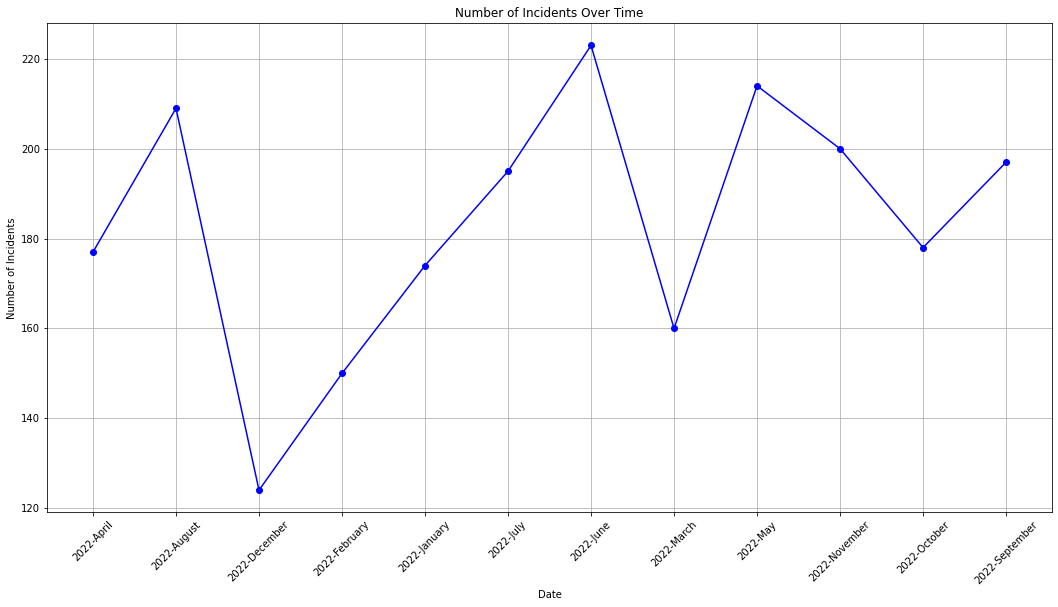

In [45]:
# Create a time series plot
plt.figure(figsize=(18, 9))
plt.plot(incident_counts.index, incident_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# Number of Deaths by Year

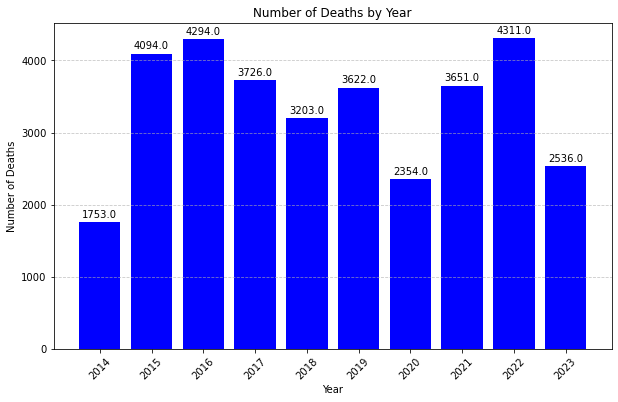

In [48]:
# Group the data by year and sum the number of deaths for each year
deaths_by_year = df.groupby('Incident year')['Number of Dead'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(deaths_by_year['Incident year'], deaths_by_year['Number of Dead'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Year')
plt.xticks(deaths_by_year['Incident year'], rotation=45)  # Set custom x-axis tick labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

# Distribution of Causes of Death

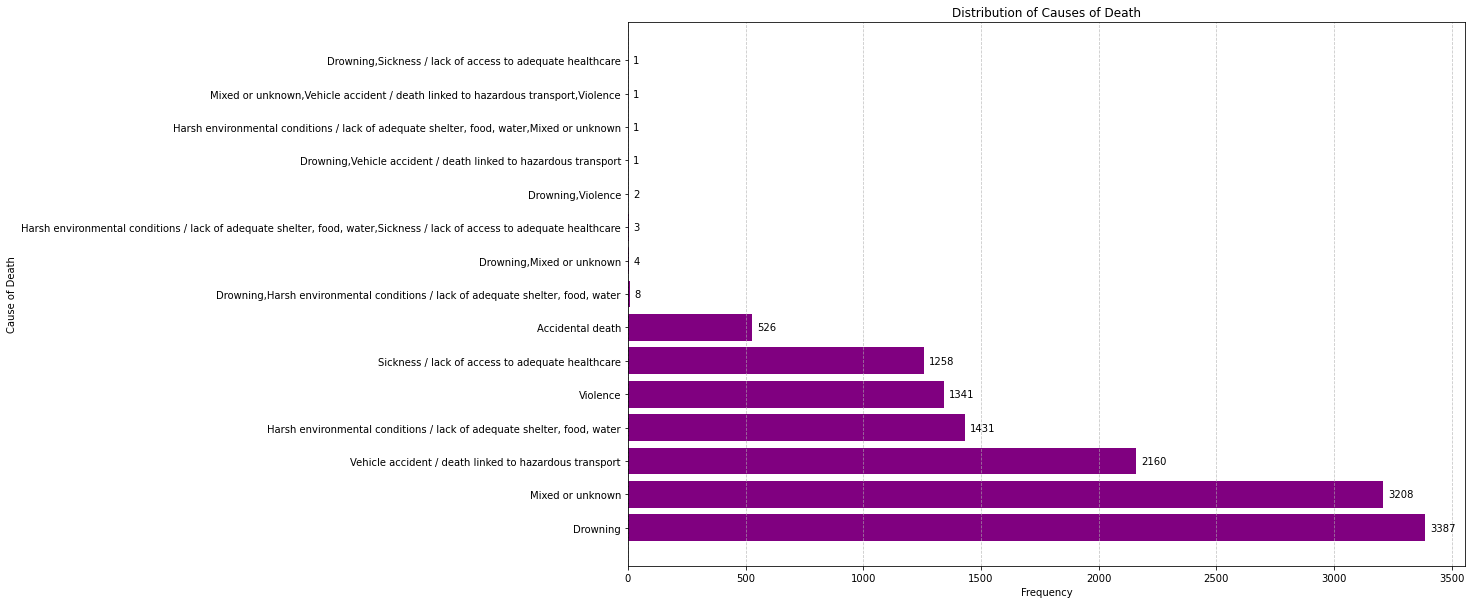

In [92]:
cause_of_death_counts = df['Cause of Death'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(15, 10))
bars = plt.barh(cause_of_death_counts.index, cause_of_death_counts.values, color='purple')
plt.xlabel('Frequency')
plt.ylabel('Cause of Death')
plt.title('Distribution of Causes of Death')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add numbers on the bars
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),  # 5 points horizontal offset for better positioning
                 textcoords="offset points",
                 ha='left', va='center')

plt.show()

# Number of Survivors by Migration Route

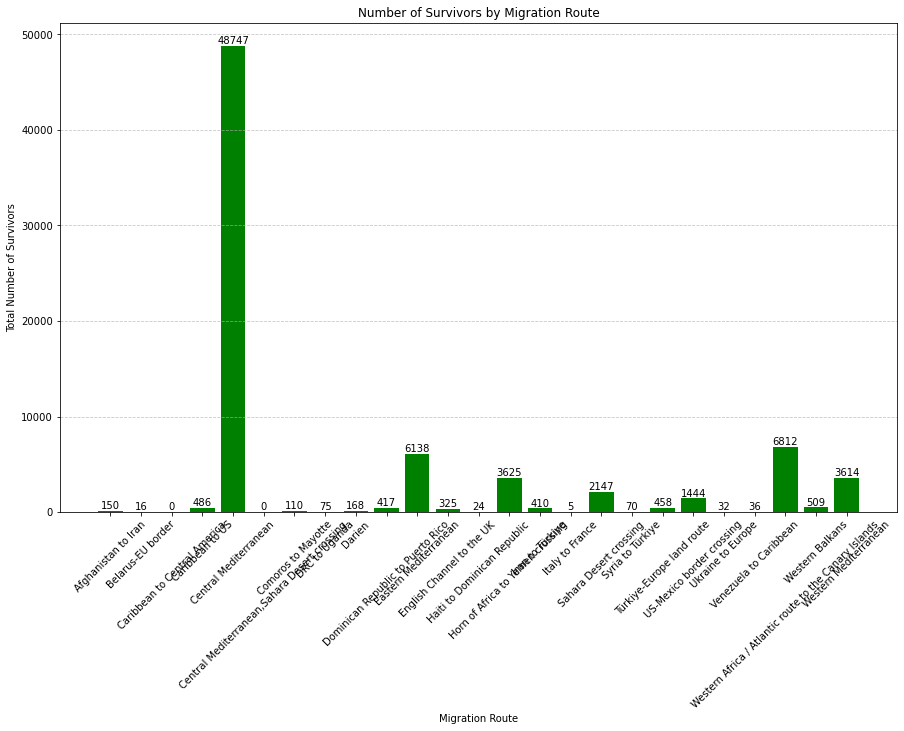

In [85]:
# Create a bar plot
plt.figure(figsize=(15, 9))
bars = plt.bar(survivors_by_route['Migration route'], survivors_by_route['Number of Survivors'], color='green')
plt.xlabel('Migration Route')
plt.ylabel('Total Number of Survivors')
plt.title('Number of Survivors by Migration Route')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

In [95]:
pip install plotly


     ---------------------------------------- 15.6/15.6 MB 5.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import plotly.express as px

# Number of Deaths Over Time by Month'

In [142]:
df['Website Date'] = pd.to_datetime(df['Website Date'])

# Extract year and month from 'Website Date' column
df['Year'] = df['Website Date'].dt.year
df['Month'] = df['Website Date'].dt.month

# Group data by year and month, and calculate the sum of 'Total Number of Dead and Missing'
fatalities_by_month = df.groupby(['Year', 'Month'])['Total Number of Dead and Missing'].sum().reset_index()


In [143]:
# Group data by year and month, and calculate the sum of 'Total Number of Dead and Missing'
fatalities_by_month = df.groupby(['Year', 'Month'])['Total Number of Dead and Missing'].sum().reset_index()

# Create an interactive line plot with Plotly
fig = px.line(fatalities_by_month, x='Month', y='Total Number of Dead and Missing',
              color='Year', labels={'Total Number of Dead and Missing': 'Fatalities'},
              title='Fatalities by Month for Each Year')

# Customize the hover behavior to display numbers
fig.update_traces(mode='markers+lines', hovertemplate='%{y}')

# Set the x-axis labels
fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)),
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the interactive plot
fig.show()